# Task-2: Predict the percentage of marks of a student based on the number of study hours.##

## NAME: SHRUTI GHARGI ##

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# The output of plotting commands is displayed inline within frontends,directly below the code cell that produced it.
%matplotlib inline 

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Dataset imported")

Dataset imported


In [3]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


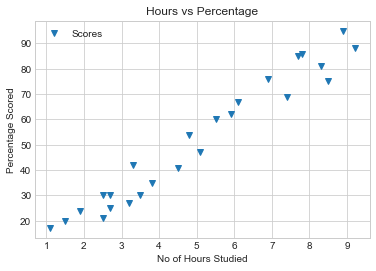

In [4]:
#Plotting data points on a 2D graph to manually find relationship between the data
dataset.plot(x='Hours', y='Scores', style='v')
plt.title('Hours vs Percentage')
plt.xlabel('No of Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

**From the graph, we can infer that there is a positive linear relation between Number of Hours studied and Percentage of Score.**

## Preparing the Data ##

In [5]:
# The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values

In [6]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

**Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do
this by using Scikit-Learn's built-in train_test_split() method:**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

In [9]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [10]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

## Training the Algorithm

**We have split our data into training and testing sets, and now is finally the time to train our algorithm.**

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("Training complete.")

Training complete.


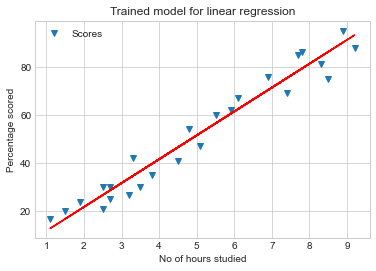

In [12]:
# Plotting the regression line (a * X + b)
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
#plt.scatter(X, Y)
dataset.plot(x='Hours', y='Scores', style='v')
plt.plot(X, line, color='Red')
plt.title("Trained model for linear regression")
plt.xlabel("No of hours studied")
plt.ylabel("Percentage scored")
plt.show()

## Making Predictions

**Now that we have trained our algorithm, it's time to make some predictions.**

In [13]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores
Y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [14]:
# Comparing Actual vs Predicted
pred = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
pred

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
#Accuracy of the model
from sklearn import metrics
result= metrics.r2_score(Y_test,Y_pred)
print("Accuracy= ", result*100)

Accuracy=  94.54906892105356


## Testing against custom input ##

In [16]:
hours=9.25
own_pred = regressor.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the model ##


In [17]:
from sklearn import metrics
import math
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred))
mse=metrics.mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error',mse)
rmse=math.sqrt(mse)
print('Root Mean Square Error:',rmse)

Mean Absolute Error: 4.183859899002975
Mean Squared Error 21.5987693072174
Root Mean Square Error: 4.6474476121003665


## Conclusion ##

**A student studying for 9.25 hours is likely to score 93.69%.**